<a href="https://colab.research.google.com/github/bkgsur/FinanceModelingComputationWithPython/blob/main/AIF/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**using SKLEARN**

In [ ]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from pylab import plt

In [ ]:
def f(x):
  return 2*(x**2) - (x**3)/3

x = np.linspace(-2,4,25)
y = f(x)

In [ ]:
def randomdata():
  np.random.seed(0)
  x = np.linspace(-1,1)
  y = np.random.random(len(x))*2-1
  return x,y

x,y = randomdata()
x =  x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
model = MLPRegressor(hidden_layer_sizes= 5* [256],
                     learning_rate_init=0.03,
                     max_iter= 5000)
model.fit(x.reshape(-1,1),y)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=[256, 256, 256, 256, 256],
             learning_rate_init=0.03, max_iter=5000)

In [ ]:
y_ = model.predict(x)
mse = ((y-y_)**2).mean()
mse

0.32003437477764174

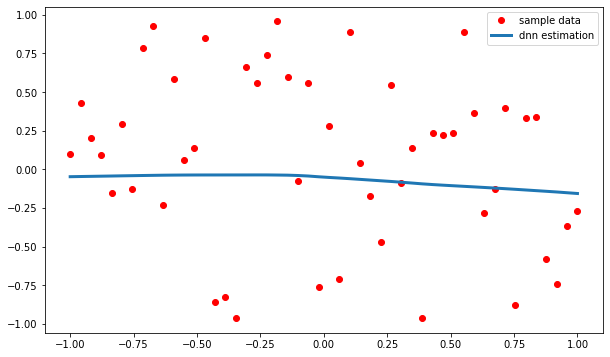

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'ro',label ='sample data')
plt.plot(x,y_, lw=3.0, label = 'dnn estimation')
plt.legend()

**KERAS**

In [ ]:
import tensorflow as tf
tf.random.set_seed(100)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential


In [ ]:
def simple_kerasModel1():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=1))
  model.add(Dense(1,activation='linear'))
  model.compile(loss='mse', optimizer='rmsprop')
  return model


In [ ]:
def better_keras_model():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_dim=1))
  for _ in range(3):
    model.add(Dense(256, activation='relu'))
  model.add(Dense(1,activation='linear'))
  model.compile(loss='mse', optimizer='rmsprop')
  return model


In [ ]:
def plot_results(model):
  plt.figure(figsize=(10,6))
  plt.plot(x,y, 'ro', label = 'Original data')
  for i in range(1,6):
    model.fit(x,y,epochs=500, verbose=False)
    y_ = model.predict(x)
    MSE = ((y-y_.flatten())**2).mean()
    print(f'round={i} | MSE ={MSE:.5f}')
    plt.plot(x,y_, '--', label = f'round={i}')
  plt.legend()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 256)               512       
                                                                 
 dense_20 (Dense)            (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
None
round=1 | MSE =0.31867
round=2 | MSE =0.32192
round=3 | MSE =0.32468
round=4 | MSE =0.32648
round=5 | MSE =0.32946


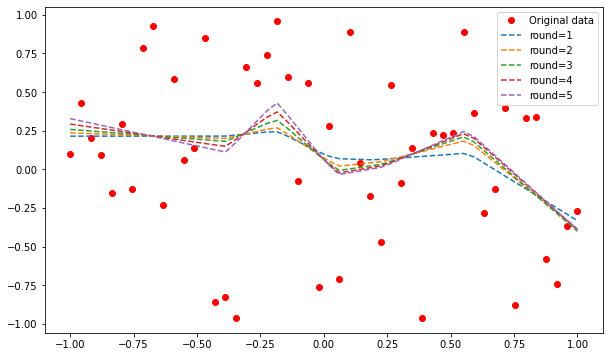

In [ ]:
simple_model = simple_kerasModel1()
print(simple_model.summary())
plot_results(simple_model)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               512       
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 256)               65792     
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_________________________________________________________________
None
round=1 | MSE =0.44569
round=2 | MSE =0.518

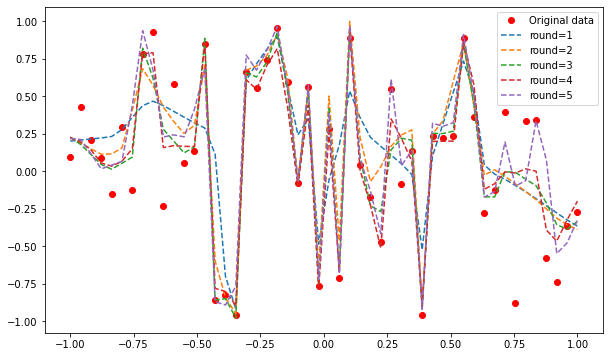

In [ ]:
better_model = better_keras_model()
print(better_model.summary())
plot_results(better_model)


**Classification**

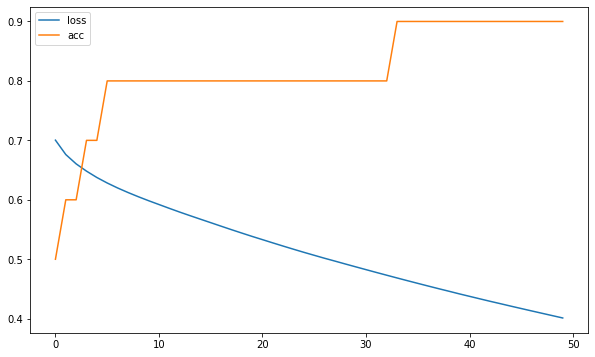

In [ ]:
import pandas as pd
f = 5
n = 10
np.random.seed(100)
X = np.random.randint(0,2,(n,f))
Y = np.random.randint(0,2,n)

model = Sequential()
model.add(Dense(256,activation='relu', input_dim = f ))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])
h = model.fit(X,Y,epochs=50, verbose=False)
Y_ = np.where(model.predict(X).flatten()>0.5,1,0)


res = pd.DataFrame(h.history)
res.plot(figsize=(10,6));